In [200]:
#Je vais cluster par équipes , : x , Nombre de matchs gagnés : y
import pandas as pd
import random
team_home = pd.read_csv('train_home_team_statistics_df.csv')
team_away = pd.read_csv('train_away_team_statistics_df.csv')
#concaténer les deux sans répétition
team = pd.concat([team_home, team_away]).drop_duplicates(keep=False)
#supprimer les valeurs manquantes
team.dropna(inplace=True)
team.head(10)
team

,ID,LEAGUE,TEAM_NAME,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,...,TEAM_YELLOWCARDS_5_last_match_std,TEAM_REDCARDS_5_last_match_std,TEAM_OFFSIDES_5_last_match_std,TEAM_ATTACKS_5_last_match_std,TEAM_PENALTIES_5_last_match_std,TEAM_SUBSTITUTIONS_5_last_match_std,TEAM_BALL_SAFE_5_last_match_std,TEAM_DANGEROUS_ATTACKS_5_last_match_std,TEAM_INJURIES_5_last_match_std,TEAM_GOALS_5_last_match_std
0,0,Ligue 1,Toulouse,3.0,2.0,5.0,2.0,1.0,2.0,2.0,...,3.0,0.0,6.0,0.0,10.0,8.0,7.0,2.0,4.0,3.0
1,1,Ligue 2,Brest,6.0,8.0,3.0,6.0,5.0,8.0,7.0,...,4.0,0.0,4.0,3.0,10.0,0.0,1.0,2.0,8.0,4.0
2,2,Serie A,Sampdoria,4.0,2.0,5.0,2.0,8.0,1.0,1.0,...,4.0,5.0,6.0,3.0,6.0,7.0,2.0,3.0,2.0,4.0
4,4,Premier League,Wolverhampton Wanderers,3.0,3.0,2.0,3.0,4.0,4.0,3.0,...,1.0,0.0,2.0,5.0,8.0,7.0,2.0,6.0,4.0,4.0
5,5,Liga Portugal,Sporting CP,7.0,6.0,9.0,5.0,10.0,8.0,9.0,...,10.0,8.0,1.0,6.0,4.0,0.0,10.0,4.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12295,12295,Serie A,Milan,10.0,10.0,10.0,10.0,10.0,6.0,6.0,...,5.0,0.0,0.0,3.0,9.0,4.0,1.0,3.0,9.0,0.0
12296,12296,J-League,Consadole Sapporo,7.0,8.0,6.0,6.0,5.0,5.0,5.0,...,7.0,10.0,3.0,2.0,5.0,6.0,1.0,3.0,7.0,2.0
12299,12299,Liga Portugal,Marítimo,3.0,2.0,6.0,1.0,3.0,4.0,4.0,...,7.0,5.0,2.0,2.0,0.0,0.0,1.0,6.0,9.0,1.0
12300,12300,Bundesliga,RB Leipzig,7.0,7.0,6.0,7.0,3.0,3.0,2.0,...,8.0,0.0,3.0,2.0,0.0,0.0,6.0,3.0,4.0,4.0


In [158]:
from sklearn.cluster import KMeans
import random
#choisir les colonnes du modèle qui contiennent des données numériques , ce sont les caractéristiques de chaque équipe sauf l'ID.
#Des données home et away
#Qui vont être séparées pour le moment
chosen_features_home = team_home.keys()[3:143]
chosen_features_home = team_home.select_dtypes(include = ["float64"])
chosen_features_home.dropna(inplace=True)
chosen_features_away = team_away.keys()[3:143]
chosen_features_away = team_away.select_dtypes(include = ["float64"])
chosen_features_away.dropna(inplace=True)

In [207]:
#Le clustering va être fait sur les données semblables car elles sont les plus intéressantes
common_features = chosen_features_home.columns.intersection(chosen_features_away.columns)
common_features.dropna()

Index(['TEAM_SHOTS_TOTAL_season_sum', 'TEAM_SHOTS_INSIDEBOX_season_sum',
       'TEAM_SHOTS_OFF_TARGET_season_sum', 'TEAM_SHOTS_ON_TARGET_season_sum',
       'TEAM_SHOTS_OUTSIDEBOX_season_sum', 'TEAM_PASSES_season_sum',
       'TEAM_SUCCESSFUL_PASSES_season_sum', 'TEAM_SAVES_season_sum',
       'TEAM_CORNERS_season_sum', 'TEAM_FOULS_season_sum',
       ...
       'TEAM_YELLOWCARDS_5_last_match_std', 'TEAM_REDCARDS_5_last_match_std',
       'TEAM_OFFSIDES_5_last_match_std', 'TEAM_ATTACKS_5_last_match_std',
       'TEAM_PENALTIES_5_last_match_std',
       'TEAM_SUBSTITUTIONS_5_last_match_std',
       'TEAM_BALL_SAFE_5_last_match_std',
       'TEAM_DANGEROUS_ATTACKS_5_last_match_std',
       'TEAM_INJURIES_5_last_match_std', 'TEAM_GOALS_5_last_match_std'],
      dtype='object', length=140)

In [222]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Normaliser les données pour une visualisation plus précise
scaler = StandardScaler()
normalized_features = scaler.fit_transform(team[common_features])
#Créer un nouveau data frame avec les données normalisées
df_normalised = pd.DataFrame(normalized_features, columns=common_features)
df_normalised

,TEAM_SHOTS_TOTAL_season_sum,TEAM_SHOTS_INSIDEBOX_season_sum,TEAM_SHOTS_OFF_TARGET_season_sum,TEAM_SHOTS_ON_TARGET_season_sum,TEAM_SHOTS_OUTSIDEBOX_season_sum,TEAM_PASSES_season_sum,TEAM_SUCCESSFUL_PASSES_season_sum,TEAM_SAVES_season_sum,TEAM_CORNERS_season_sum,TEAM_FOULS_season_sum,...,TEAM_YELLOWCARDS_5_last_match_std,TEAM_REDCARDS_5_last_match_std,TEAM_OFFSIDES_5_last_match_std,TEAM_ATTACKS_5_last_match_std,TEAM_PENALTIES_5_last_match_std,TEAM_SUBSTITUTIONS_5_last_match_std,TEAM_BALL_SAFE_5_last_match_std,TEAM_DANGEROUS_ATTACKS_5_last_match_std,TEAM_INJURIES_5_last_match_std,TEAM_GOALS_5_last_match_std
0,-0.526560,-0.764435,0.150179,-0.718269,-1.318722,-0.774032,-0.711804,0.109051,-0.511797,0.318525,...,-0.349380,-0.766353,0.877993,-1.405907,1.707652,1.422066,1.115593,-0.618550,0.041412,-0.214323
1,0.526100,1.305233,-0.564967,0.679277,0.096317,1.305621,1.015197,1.873351,0.559483,1.030443,...,0.003641,-0.766353,0.165144,-0.340200,1.707652,-0.888671,-0.992870,-0.618550,1.486324,0.135356
2,-0.175673,-0.764435,0.150179,-0.718269,1.157596,-1.120641,-1.057204,-0.949529,-0.868890,0.674484,...,0.003641,0.564648,0.877993,-0.340200,0.620061,1.133224,-0.641459,-0.259981,-0.681044,0.135356
3,-0.526560,-0.419490,-0.922539,-0.368883,-0.257443,-0.080815,-0.366403,-0.243809,-0.154703,0.674484,...,-1.055421,-0.766353,-0.547704,0.370272,1.163857,1.133224,-0.641459,0.815727,0.041412,0.135356
4,0.876986,0.615344,1.580470,0.329891,1.865115,1.305621,1.705998,0.109051,0.202390,-1.105310,...,2.121766,1.363248,-0.904129,0.725508,0.076266,-0.888671,2.169825,0.098588,-0.681044,-0.913682
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16769,1.929646,1.995123,1.938043,2.076824,1.865115,0.612403,0.669797,0.109051,1.987856,1.030443,...,0.356662,-0.766353,-1.260553,-0.340200,1.435754,0.266698,-0.992870,-0.259981,1.847552,-1.263362
16770,0.876986,1.305233,0.507752,0.679277,0.096317,0.265794,0.324397,0.814771,0.916576,1.742361,...,1.062703,1.895649,-0.191280,-0.695435,0.348163,0.844382,-0.992870,-0.259981,1.125096,-0.564003
16771,-0.526560,-0.764435,0.507752,-1.067656,-0.611202,-0.080815,-0.021003,0.814771,-1.583076,0.318525,...,1.062703,0.564648,-0.547704,-0.695435,-1.011325,-0.888671,-0.992870,0.815727,1.847552,-0.913682
16772,0.876986,0.960289,0.507752,1.028664,-0.611202,-0.427424,-0.711804,-0.243809,-0.154703,1.386402,...,1.415724,-0.766353,-0.191280,-0.695435,-1.011325,-0.888671,0.764183,-0.259981,0.041412,0.135356


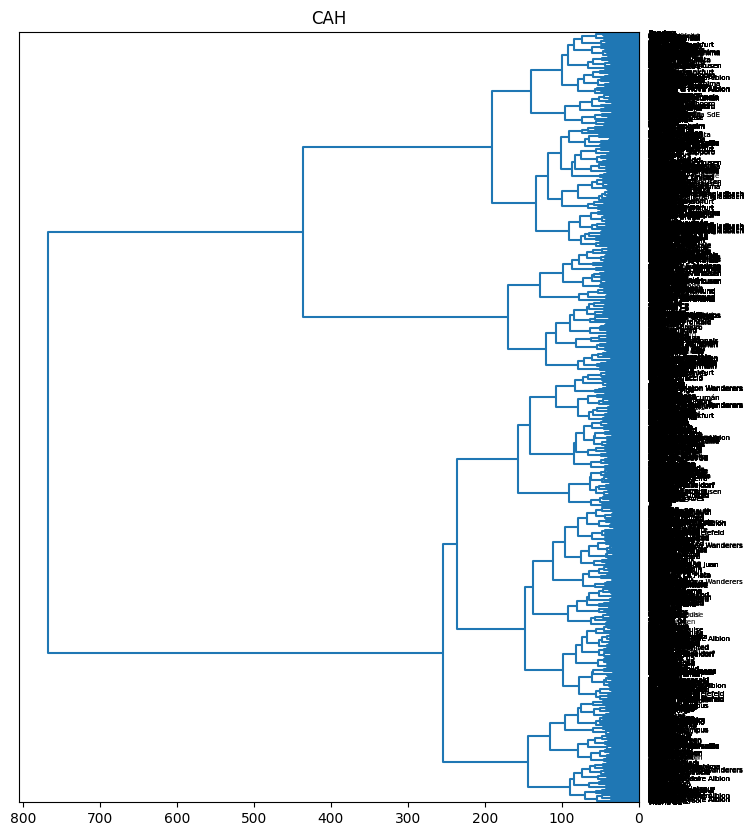

In [223]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from pylab import rcParams

# Ajouter le data frame des noms des équipes aux données standardisées
df_normalised.index = team["TEAM_NAME"]

rcParams['figure.figsize'] = 8, 10
#Applicaion de la méthode CAH
Z = linkage(df_normalised,method='ward',metric='euclidean')
plt.title("CAH")
#Plotter le dendrogram
dendrogram(Z,labels=df_normalised.index,orientation='left',color_threshold=0)
plt.show()